## Observations and Inferences

1. Ramicane and Capomulin, were the most effective in consistently reducing the volume of their subjects' tumors. Capomulin, in particular, performed particularly well in clinical trials displaying clear consistent signs of reducing the average volume of SCC tumors across all subjects. Glacing over the summary statistics, I was intrigued to find that Ramicane slightly outperformed Capomulin in the overall reduction of tumor size. More insight will need to be conducted for a detailed breakdown of Ramicane vs. Capomulin specifically.

2. All other drug regimens were proven to not be consistently effective in treating SCC on the mice. It is difficult at this time to tell if these drugs did not inhibit the tumor growth, or may have actually worsened their condition.

3. It is evident that there is a strong positive relationship between the weight of a test subject and the volume of their respective tumors. Maintaining a lower body weight can help lower the volume of the tumor and perhaps lower the rate at which it grows on the subject.

## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
total_mice = merge_df["Mouse ID"].count()
total_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_k403 = merge_df[merge_df["Mouse ID"].isin(["k403"])]
mouse_k403

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mice_nondupes = merge_df.drop_duplicates('Mouse ID', keep='last')

# Keeping the last row will keep the last timepoint associated with the mouse ID.

mice_nondupes.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [5]:
# Checking the number of mice in the clean DataFrame.
actual_mice = mice_nondupes["Mouse ID"].count()
actual_mice

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEMof the tumor volume for each regimen

regimen_df = merge_df.groupby(["Drug Regimen"])

tumor_df = pd.DataFrame({"Mean": regimen_df["Tumor Volume (mm3)"].mean(),
                         "Median": regimen_df["Tumor Volume (mm3)"].median(),
                         "Variance": regimen_df["Tumor Volume (mm3)"].var(),
                         "Std Dev": regimen_df["Tumor Volume (mm3)"].std(),
                         "SEM": regimen_df["Tumor Volume (mm3)"].sem()
})

tumor_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

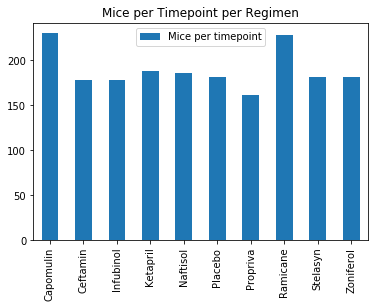

In [7]:
# Generate a bar plot showing the number of mice per timepoint for each treatment throughout the course 
# of the study using pandas.

ax = pd.DataFrame(
    {"Mice per timepoint": [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]},
     index = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
              "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

ax.plot(kind="bar", title ="Mice per Timepoint per Regimen",legend=True)

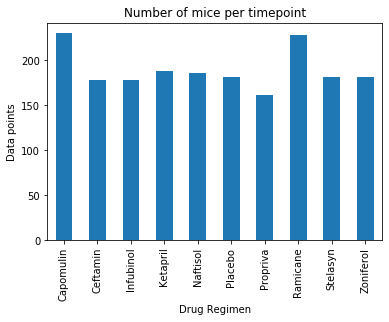

In [8]:
# Generate a bar plot showing the number of mice per timepoint for each treatment throughout the course
# of the study using pyplot.

regimen_datapoints = regimen_df["Mouse ID"].count()
regimen_datapoints.plot(kind = 'bar')

plt.title("Number of mice per timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Data points")

plt.show()

## Pie Plots

In [9]:
gender_breakdown = mouse_metadata['Sex'].value_counts()
gender_breakdown
# gender_breakdown = 125 male, 124 female

Male      125
Female    124
Name: Sex, dtype: int64

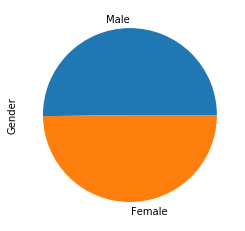

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame({'Gender': [125, 124]},
                  index=['Male', 'Female'])
sex_pie = gender_df.plot.pie(y='Gender', legend=None)

<function matplotlib.pyplot.show(*args, **kw)>

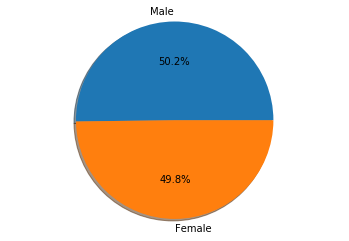

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['b', 'y']
gender_breakdown = [125, 124]
labels = ['Male', 'Female']

fig1, ax1 = plt.subplots()
ax1.pie(gender_breakdown, labels=labels, autopct='%1.1f%%', shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.show

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

mice_drugs = merge_df.groupby(["Drug Regimen", "Mouse ID"])
promising = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]

mice_totals = mice_drugs.last()
tumor_volumes = [i for i in promising]
tumor_output = [mice_totals['Tumor Volume (mm3)'][tumor_volumes]]
tumor_volumes_df = pd.DataFrame(tumor_output).transpose().reset_index()
tumor_volumes_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

im_a_tumor = [tumor_volumes_df.loc[tumor_volumes_df["Drug Regimen"] == promising[i], "Tumor Volume (mm3)"] for i in range(4)]

for i in range(4):
    quartiles = im_a_tumor[i].quantile([0.25, 0.5, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = round(upper-lower,2)
    lower_q = lower - (1.5 * iqr)
    upper_q = upper + (1.5 * iqr)
    print(f"The IQR for regimen for Regimen {i+1} is {iqr}.")

The IQR for regimen for Regimen 1 is 7.78.
The IQR for regimen for Regimen 2 is 9.1.
The IQR for regimen for Regimen 3 is 15.58.
The IQR for regimen for Regimen 4 is 11.48.


{'whiskers': [<matplotlib.lines.Line2D at 0x1f7d1676f08>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7d167bdc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7d1676708>,
 'medians': [<matplotlib.lines.Line2D at 0x1f7d167bf88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f7d1682d48>,
 'means': []}

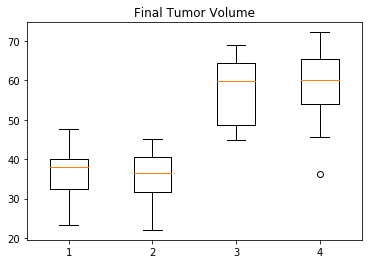

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.boxplot(im_a_tumor)

## Line and Scatter Plots

In [15]:
# Create a dataframe for one mouse on Capomulin
mouse_x401 = merge_df[merge_df["Mouse ID"].isin(["x401"])]
mouse_x401

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


Text(0.5, 1.0, 'Tumor Volume of Mouse x401 over Time with Capomulin')

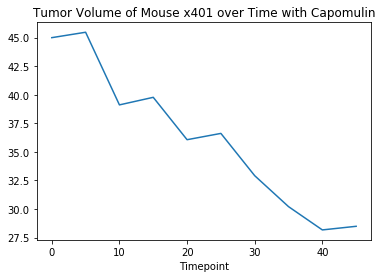

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin.

plt.plot(mouse_x401["Timepoint"], mouse_x401["Tumor Volume (mm3)"])

plt.xlabel("Timepoint")
plt.title("Tumor Volume of Mouse x401 over Time with Capomulin")

# For some reason I receive an error that states "'str' object is not callable" whenever I try to create the y-axis
# plt.ylabel("Tumor Volume (mm3)") 

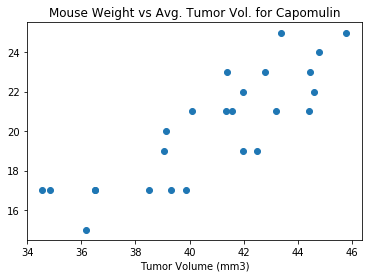

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mice_df = merge_df.groupby(["Mouse ID"])

test_drug = merge_df[merge_df["Drug Regimen"] == "Capomulin"]
test_drug

test_drug_subjects = test_drug["Mouse ID"].unique()
test_drug_subjects

test_mice_avg_tumor_vol = pd.Series([mice_df.get_group(m)["Tumor Volume (mm3)"].mean() for m in test_drug_subjects])
test_mice_weight = pd.Series([mice_df.get_group(m)["Weight (g)"].sum()/mice_df.get_group(m)["Weight (g)"].count() for m in test_drug_subjects])

plt.scatter(test_mice_avg_tumor_vol, test_mice_weight)
plt.title('Mouse Weight vs Avg. Tumor Vol. for Capomulin')
plt.xlabel("Tumor Volume (mm3)")
# plt.ylabel("Weight (g)") <-- why coming in as "'str' object is not callable"?

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


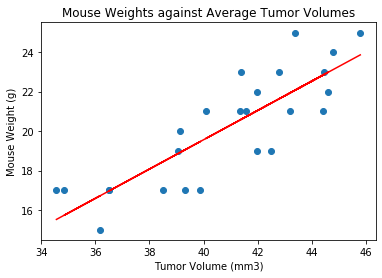

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(vw_slope, vw_int, vw_r, vw_p, vw_std_err) = st.linregress(test_mice_avg_tumor_vol, test_mice_weight)
regress_values = vw_slope * test_mice_avg_tumor_vol + vw_int

line_eq = "y = " + str(round(vw_slope,2)) + "x + " + str(round(vw_int,2))

slope, intercept, r_value, p_value, std_err = st.linregress(test_mice_avg_tumor_vol, test_mice_weight)

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(test_mice_avg_tumor_vol,test_mice_weight)[0],2)}")

plt.scatter(test_mice_avg_tumor_vol,test_mice_weight)
plt.plot(test_mice_avg_tumor_vol,regress_values,"r-")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse Weights against Average Tumor Volumes")
plt.show()